<a href="https://colab.research.google.com/github/Muhammad-Hozefa-Haider/airlift_case_study/blob/main/Airlift_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airlift Technologies
## Case Study - Analyst

By: Muhammad Hozefa Haider

The purpose of this notebook is to document and answer the following three questions asked in the case study provided by Airlift technologies for Lift Graduate Program.
1.	 Explore the data and share your findings. Do you see any interesting patterns?
2.	Forecast daily orders for the next week (9th November, 2021 - 15th November, 2021) for both, EW1 and EW2.
3.	How can you measure forecasting accuracy of a forecasting model?


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
data = pd.read_csv('/content/gdrive/My Drive/CaseStudy_Data.csv', parse_dates = ['date'])

In [7]:
data

,warehouse,date,total_orders
0,EW1,2021-08-10,455
1,EW1,2021-08-11,553
2,EW1,2021-08-12,569
3,EW1,2021-08-13,426
4,EW1,2021-08-14,536
...,...,...,...
140,EW2,2021-11-04,1490
141,EW2,2021-11-05,1067
142,EW2,2021-11-06,1591
143,EW2,2021-11-07,1696


In [8]:
data.dtypes

warehouse               object
date            datetime64[ns]
total_orders             int64
dtype: object

In [9]:
data.describe()

,total_orders
count,145.000000
mean,665.737931
std,432.390401
min,4.000000
25%,375.000000
50%,526.000000
75%,946.000000
max,1728.000000


In [10]:
EW1 = data[data['warehouse']=='EW1']
EW2 = data[data['warehouse']=='EW2']
del EW1['warehouse']
del EW2['warehouse']

EW1.rename(
    columns={"date":"ds",
                "total_orders":"y"}
          ,inplace=True)

EW2.rename(
    columns={"date":"ds",
                "total_orders":"y"}
          ,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
#Model for EW1

from fbprophet import Prophet

# define the model
model = Prophet()
# fit the model
model.fit(EW1)

future = model.make_future_dataframe(periods=7)
future.tail(7)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
90,2021-11-09,344.877242,10.008120,705.249905
91,2021-11-10,277.273082,-70.462685,628.215082
92,2021-11-11,328.376068,3.005984,647.502355
93,2021-11-12,300.467551,-34.443494,621.394413
94,2021-11-13,371.154452,3.651256,717.706690
95,2021-11-14,375.217830,78.345844,728.426146
96,2021-11-15,317.401100,-47.724379,659.111194


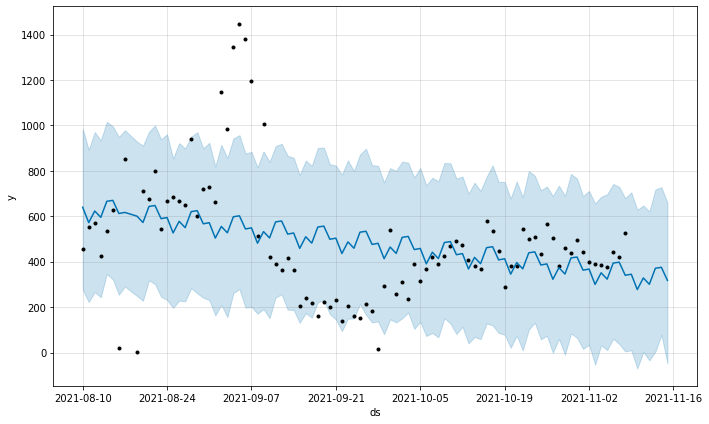

In [12]:
fig1 = model.plot(forecast)

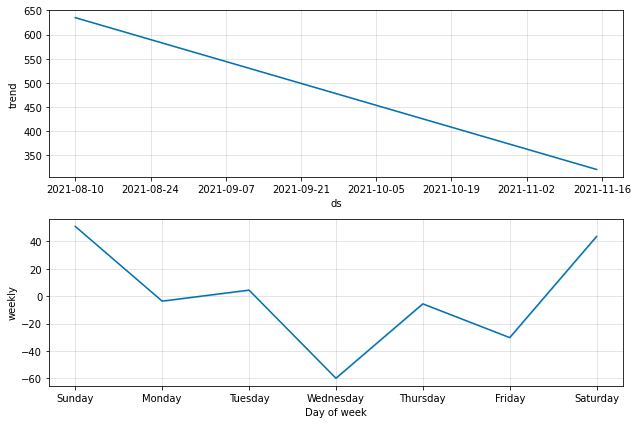

In [13]:
fig2 = model.plot_components(forecast)

In [14]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [15]:
# Model for EW2
from fbprophet import Prophet

# define the model
model2 = Prophet()
# fit the model
model2.fit(EW2)

future2 = model2.make_future_dataframe(periods=7)
future2.tail(7)

forecast2 = model2.predict(future2)
;;;;;;;;;;;
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
55,2021-11-09,1640.141917,1396.726635,1860.916374
56,2021-11-10,1783.931121,1550.991752,2054.833361
57,2021-11-11,1826.906821,1585.330642,2070.831060
58,2021-11-12,1644.799802,1405.657602,1860.634074
59,2021-11-13,1860.802103,1617.891005,2098.769013
60,2021-11-14,1852.842328,1624.362681,2110.783896
61,2021-11-15,1937.013216,1680.908464,2173.705062


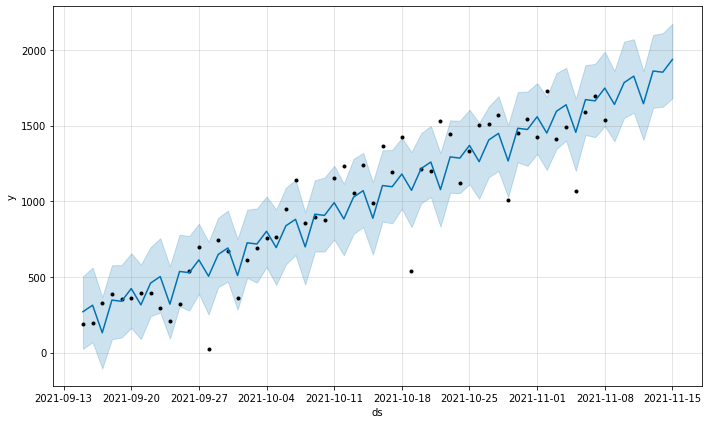

In [16]:
fig3 = model2.plot(forecast2)

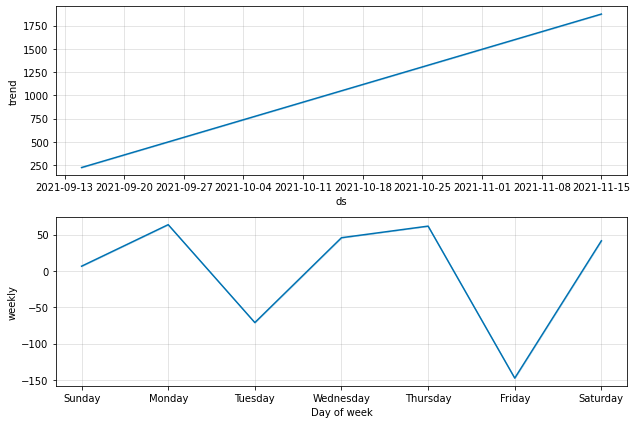

In [17]:
fig4 = model2.plot_components(forecast2)

In [18]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model2, forecast2)

In [20]:
from fbprophet.diagnostics import cross_validation
EW1_cv = cross_validation(model, initial='60 days', period='30 days', horizon = '7 days')
from fbprophet.diagnostics import performance_metrics
EW1_p = performance_metrics(EW1_cv)
EW1_p

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-11-01 00:00:00 and 2021-11-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,2943.543537,54.254433,54.254433,0.136318,0.136318,1.0
1,2 days,14250.585814,119.375818,119.375818,0.305309,0.305309,1.0
2,3 days,3499.029268,59.152593,59.152593,0.153245,0.153245,1.0
3,4 days,6005.570230,77.495614,77.495614,0.206655,0.206655,1.0
4,5 days,5233.483559,72.342820,72.342820,0.164043,0.164043,1.0
5,6 days,2141.874600,46.280391,46.280391,0.109930,0.109930,1.0
6,7 days,49578.903936,222.663207,222.663207,0.423314,0.423314,1.0


In [21]:
from fbprophet.diagnostics import cross_validation
EW2_cv = cross_validation(model2, initial='40 days', period='15 days', horizon = '7 days')
from fbprophet.diagnostics import performance_metrics
EW2_p = performance_metrics(EW2_cv)
EW2_p

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-11-01 00:00:00 and 2021-11-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,71711.459038,267.789953,267.789953,0.154971,0.154971,0.0
1,2 days,72760.310859,269.741192,269.741192,0.190765,0.190765,0.0
2,3 days,53840.828082,232.036265,232.036265,0.155729,0.155729,0.0
3,4 days,257342.856991,507.289717,507.289717,0.475436,0.475436,0.0
4,5 days,24151.954263,155.408990,155.408990,0.097680,0.097680,1.0
5,6 days,694.695467,26.357076,26.357076,0.015541,0.015541,1.0
6,7 days,92574.343199,304.260321,304.260321,0.197957,0.197957,0.0


In [ ]:
metric_EW1 = forecast.set_index('ds')[['yhat']].join(EW1.set_index('ds').y).reset_index()
metric_EW1.dropna(inplace=True)
metric_EW1.tail()

In [ ]:
r2= r2_score(metric_EW1.y, metric_EW1.yhat)
mse = mean_squared_error(metric_EW1.y, metric_EW1.yhat)
mae = mean_absolute_error(metric_EW1.y, metric_EW1.yhat)

print('The r2 score for EW1 is ', r2)
print('\nThe mean squared error for EW1 is ', mse)
print('\nThe mean absolute error for EW1 is ', mae)

In [ ]:
metric_EW2 = forecast.set_index('ds')[['yhat']].join(EW2.set_index('ds').y).reset_index()
metric_EW2.dropna(inplace=True)
metric_EW2.tail()

In [ ]:
r22= r2_score(metric_EW2.y, metric_EW2.yhat)
mse2 = mean_squared_error(metric_EW2.y, metric_EW2.yhat)
mae2 = mean_absolute_error(metric_EW2.y, metric_EW2.yhat)

print('The r2 score for EW1 is ', r2)
print('\nThe mean sqaured error for EW1 is ', mse)
print('\nThe mean absolute error for EW1 is ', mae)